Preprocessing and training of dataset found at
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?resource=download

In [1]:
import re
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag

PATH = '../kaggle_dataset2/'

def get_wordnet_pos(tag):
    """Convert POS tag to WordNet format"""
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    return wordnet.NOUN  # Default to noun
    

# Extend punctuation list
punctuation += '’‘“”–'
def preprocess_text(text: str) -> str:
    
    """Apply multiple text processing steps in sequence."""
    # Remove punctuation
    for p in punctuation:
        text = text.replace(p, ' ')
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)

    # Lemmatization with POS tagging
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    
    
    text = ' '.join(lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags)

    # Remove non-matching regex words
    pattern = re.compile(r"\b[A-Za-z]+\b")
    text = ' '.join(word for word in text.split() if pattern.fullmatch(word))
    
    # Convert to lowercase
    return text.lower()


In [2]:
fake_df = pd.read_csv(PATH+'fake.csv')
fake_df['lbl'] = 1
fake_df

,title,text,subject,date,lbl
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [3]:
true_df = pd.read_csv(PATH+'true.csv')
true_df['lbl'] = 0
true_df

,title,text,subject,date,lbl
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [4]:
df = pd.concat([true_df, fake_df], ignore_index=True)
df

,title,text,subject,date,lbl
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [5]:
dataset = df[['text', 'lbl']]
dataset

,text,lbl
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0
...,...,...
44893,21st Century Wire says As 21WIRE reported earl...,1
44894,21st Century Wire says It s a familiar theme. ...,1
44895,Patrick Henningsen 21st Century WireRemember ...,1
44896,21st Century Wire says Al Jazeera America will...,1


In [6]:
dataset.groupby('lbl')['lbl'].count()

lbl
0    21417
1    23481
Name: lbl, dtype: int64

In [8]:
import pandas as pd
import re
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from concurrent.futures import ThreadPoolExecutor

# Preprocess text function for individual text entries
def preprocess_text(text: str, lemmatizer, stop_words, punctuation_table) -> str:
    """Efficient text preprocessing: remove punctuation, stopwords, lemmatize."""
    
    # Remove punctuation using translate (faster)
    text = text.translate(punctuation_table)
    
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)

    # Lemmatization with POS tagging
    words = word_tokenize(text)
    pos_tags = pos_tag(words)

    # Apply lemmatization based on POS tag
    text = ' '.join(lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags)

    # Remove non-matching regex words (keep only alphabetic words)
    pattern = re.compile(r"\b[A-Za-z]+\b")
    text = ' '.join(word for word in text.split() if pattern.fullmatch(word))

    # Return the processed text in lowercase
    return text.lower()

# Helper function to initialize resources (stopwords, lemmatizer, punctuation map)
def initialize_resources():
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    # Build a translation table for punctuation removal (faster)
    punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’‘“”–'
    punctuation_table = str.maketrans('', '', punctuation)
    
    return lemmatizer, stop_words, punctuation_table

# Main preprocessing function to handle a Pandas Series efficiently with parallelism
def preprocess_text_series(df: pd.Series, lemmatizer, stop_words, punctuation_table) -> pd.Series:
    """Apply preprocessing steps to each row in a pandas Series (column)."""
    return df.apply(lambda text: preprocess_text(text, lemmatizer, stop_words, punctuation_table))

# Example usage with a DataFrame and ThreadPoolExecutor for parallel processing
def process_dataframe(df: pd.DataFrame):
    # Initialize shared resources once
    lemmatizer, stop_words, punctuation_table = initialize_resources()

    # Use ThreadPoolExecutor for parallel processing of text
    with ThreadPoolExecutor(max_workers=10) as executor:
        df['processed_text'] = list(executor.map(
            lambda text: preprocess_text(text, lemmatizer, stop_words, punctuation_table), 
            df['text']
        ))
    return df

# Process the DataFrame
#dataset = process_dataframe(dataset)

# Display the result
#dataset
lemmatizer, stop_words, punctuation_table = initialize_resources()
series = preprocess_text_series(dataset['text'], lemmatizer, stop_words, punctuation_table)
series

0        washington reuters the head conservative repub...
1        washington reuters transgender people allow fi...
2        washington reuters the special counsel investi...
3        washington reuters trump campaign adviser geor...
4        seattlewashington reuters president donald tru...
                               ...                        
44893    century wire say as report earlier week unlike...
44894    century wire say it familiar theme whenever di...
44895    patrick henningsen century wireremember obama ...
44896    century wire say al jazeera america go history...
44897    century wire say as predict new year look ahea...
Name: text, Length: 44898, dtype: object

In [10]:
series.isnull().sum()
dataset['text'] = series
dataset

C:\Users\stefa\AppData\Local\Temp\ipykernel_8552\2520836977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = series


,text,lbl
0,washington reuters the head conservative repub...,0
1,washington reuters transgender people allow fi...,0
2,washington reuters the special counsel investi...,0
3,washington reuters trump campaign adviser geor...,0
4,seattlewashington reuters president donald tru...,0
...,...,...
44893,century wire say as report earlier week unlike...,1
44894,century wire say it familiar theme whenever di...,1
44895,patrick henningsen century wireremember obama ...,1
44896,century wire say al jazeera america go history...,1


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
#remove very common and very rare words
vectorizer = TfidfVectorizer(min_df=0.1)
tfidf_matrix = vectorizer.fit_transform(dataset['text'])
# Convert to DataFrame
tfidf_df_text = pd.DataFrame(tfidf_matrix.todense(), columns=vectorizer.get_feature_names_out())
tfidf_df_text['lbl'] = dataset['lbl']
tfidf_df_text

,accord,accuse,act,action,add,administration,agency,allow,already,also,...,woman,work,world,would,write,year,yet,york,you,lbl
0,0.000000,0.000000,0.000000,0.047105,0.042044,0.083927,0.000000,0.000000,0.047237,0.085146,...,0.000000,0.035484,0.000000,0.075992,0.000000,0.088469,0.049176,0.000000,0.0,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.454006,0.000000,0.095045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.164432,0.000000,0.000000,0.000000,0.000000,0.0,0
2,0.000000,0.063369,0.000000,0.000000,0.000000,0.106788,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.032230,0.000000,0.037522,0.000000,0.119850,0.0,0
3,0.069790,0.083056,0.000000,0.078556,0.000000,0.000000,0.000000,0.000000,0.000000,0.047332,...,0.000000,0.000000,0.000000,0.042243,0.000000,0.049180,0.000000,0.235626,0.0,0
4,0.130800,0.000000,0.000000,0.000000,0.000000,0.000000,0.097688,0.000000,0.000000,0.059140,...,0.000000,0.000000,0.044086,0.026391,0.049208,0.153620,0.000000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,0.000000,0.000000,0.172236,0.177650,0.000000,0.158261,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.159586,0.143297,0.000000,0.000000,0.000000,0.088809,0.0,1
44894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1
44895,0.034124,0.020305,0.037239,0.000000,0.000000,0.034218,0.000000,0.089543,0.077036,0.115715,...,0.056333,0.072336,0.051756,0.144584,0.000000,0.084162,0.020049,0.038403,0.0,1
44896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.139223,0.000000,0.099385,0.000000,0.057852,0.000000,0.000000,0.0,1


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#take splittig function
from sklearn.model_selection import train_test_split
#import ML models
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
#import metrics for evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

In [16]:
Y = tfidf_df_text['lbl']
x = tfidf_df_text.drop(columns= 'lbl')

In [17]:
x.shape

(44898, 273)

In [18]:
Y.shape

(44898,)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35918, 273), (8980, 273), (35918,), (8980,))

In [20]:
tfidf_df_text['lbl'].isna().sum()

np.int64(0)

In [21]:
def computeMetrics(y_test, Y_predict_test):
    accuracy_lgbm = accuracy_score(y_test, Y_predict_test)
    print('Accuracy is: ', accuracy_lgbm)
    precision_lgbm = precision_score(y_test, Y_predict_test)
    recall_lgbm = recall_score(y_test, Y_predict_test)
    print('Precision is: ', precision_lgbm)
    print('Recall is: ', recall_lgbm)
    roc_auc_test = roc_auc_score(y_test, Y_predict_test)
    print('AUC is: ', roc_auc_test)

def confusionMatrix(y_test, Y_predict_test):
    cm_lgbm = confusion_matrix(y_test, Y_predict_test)
    #visualise confusion matrix
    fig, ax = plt.subplots(figsize = (8, 6))
    sns.heatmap(cm_lgbm, annot = True, fmt = 'd') #with annotations formatted as decimal
    plt.show()

In [22]:
lgbm = LGBMClassifier(n_estimators = 200, max_depth = 3, learning_rate = 0.1, n_jobs = -1, verbose = -1, random_state=10)
#learning rate is the hillclimbing step in minimizing error function
#verbose = -1 disables verbose logging of all trees states
#training the model
lgbm.fit(X_train, y_train)

LGBMClassifier(max_depth=3, n_estimators=200, n_jobs=-1, random_state=10,
               verbose=-1)

In [23]:
Y_predict_test = lgbm.predict(X_test)
computeMetrics(y_test, Y_predict_test)

Accuracy is:  0.9985523385300669
Precision is:  0.9993626513702996
Recall is:  0.9978786593126856
AUC is:  0.9985877122161178


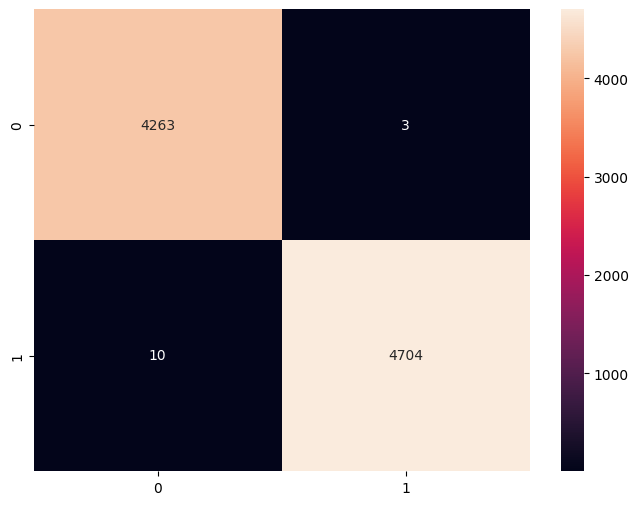

In [24]:
confusionMatrix(y_test, Y_predict_test)

In [25]:
tfidf_df_text.to_csv(PATH+'other_tfidf_text.csv', index=False)

In [26]:
#tuning the model by trying different combinations of hyperparameters
n_estimators = [200, 500, 900, 1200]
max_depths = [4, 5, 8, 10]
learning_rates = [0.01, 0.1, 0.2, 0.3]

In [27]:
#trying all combinations here and saving them in a dataframe called results
results = []
for estimator in n_estimators:
  for depth in max_depths:
    for rate in learning_rates:
      lgbm = LGBMClassifier(n_estimators=estimator, max_depth=depth, learning_rate=rate,
                            n_jobs = -1, verbose = -1, random_state = 10,
                            subsample = 0.6, colsample_bytree = 0.5)
      #fitting each model
      lgbm.fit(X_train, y_train)
      #running propensity models
      y_predict_test = lgbm.predict_proba(X_test)[:, 1]
      y_predict_train = lgbm.predict_proba(X_train)[:, 1]
      #computing auc scores for each
      auc_score_train = roc_auc_score(y_train, y_predict_train)
      auc_score_test = roc_auc_score(y_test, y_predict_test)
      #adding to results
      results.append({
          'n_estimators' : estimator,
          'max_depth' : depth,
          'learning_rate' : rate,
          'auc_train' : auc_score_train,
          'auc_test' : auc_score_test,
          'auc_diff' : auc_score_train-auc_score_test

      })
results_df = pd.DataFrame(results)

In [28]:
#sorting by the auc test result
results_df.sort_values(by = 'auc_test', ascending = False).head(20)

,n_estimators,max_depth,learning_rate,auc_train,auc_test,auc_diff
9,200,8,0.10,0.999998,0.999991,6.749554e-06
60,1200,10,0.01,0.999984,0.999984,3.970678e-08
56,1200,8,0.01,0.999984,0.999983,7.361095e-07
44,900,10,0.01,0.999979,0.999978,4.038355e-07
40,900,8,0.01,0.999980,0.999976,3.332733e-06
13,200,10,0.10,0.999998,0.999976,2.203579e-05
41,900,8,0.10,0.999999,0.999976,2.337654e-05
52,1200,5,0.01,0.999983,0.999975,7.909374e-06
57,1200,8,0.10,0.999999,0.999975,2.397326e-05
5,200,5,0.10,0.999995,0.999973,2.244091e-05


In [29]:
lgbm_final = LGBMClassifier(n_estimators=200, max_depth=8, learning_rate=0.1,
                            n_jobs = -1, verbose = -1, random_state = 10,
                            subsample = 0.6, colsample_bytree = 0.5)
lgbm_final.fit(X_train, y_train)
y_predict_proba = lgbm_final.predict_proba(X_test)
y_predict_proba_class_1 = y_predict_proba[:, 1]
roc_auc = roc_auc_score(y_test, y_predict_proba_class_1)
roc_auc
#same score

np.float64(0.9999912481021808)

In [31]:
import joblib

joblib.dump(lgbm_final, '../backend/models/new lgbm/model.pkl')
joblib.dump(vectorizer, '../backend/models/new lgbm/vectorizer.pkl')

['../backend/models/new lgbm/vectorizer.pkl']